In [49]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

# Remember, the windows are the INVERSE of the absorption features
# Next - build ability to choose seed (both in make_specs and empca)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


[ 0.54506222  0.6008077   0.60125637  0.60173421  0.60245918  0.60306632] [ 0.54506222  0.60133191  0.60229038  0.60317046  0.6041082   0.60494799]
var, Vnoise  6.74510321576e-05 6.07896767045e-05
[ 0.54506222  0.82910439  0.86719337  0.88299342  0.91406589  0.93710289] [ 0.54506222  0.63606315  0.85401734  0.8891758   0.96781257  0.97563457]
var, Vnoise  1.0403929493e-05 4.16571962045e-05


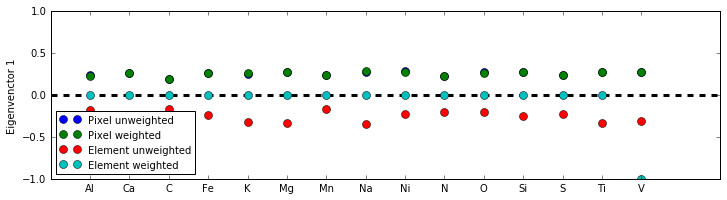

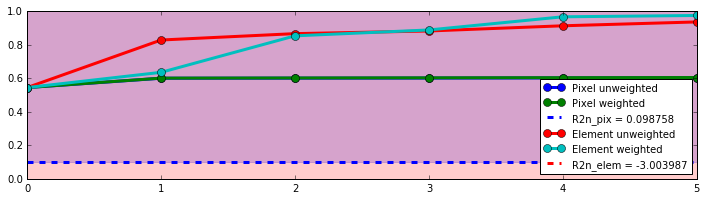

In [24]:
run test_empca -i 1

In [13]:
np.median(specs,axis=1).shape

(846,)

In [20]:
 m1,m2,w1,w2 = pix_empca(None,falsespecs.T,noise,'test.pkl',nvecs=5,deltR2=2e-3,gen=True,usemad=False,randseed=1)

In [21]:
m1

In [23]:
m2.R2(0)

0.0

PIXEL SPACE
number of unusable pixels,  0
       iter        R2             rchi2
EMPCA  1/25       0.02656003      0.00013244
EMPCA  2/25       0.16250212      0.00009910
EMPCA  3/25       0.19992654      0.00009333
EMPCA  4/25       0.21945627      0.00009055
EMPCA  5/25       0.23114063      0.00008897
EMPCA  6/25       0.23795499      0.00008807
EMPCA  7/25       0.24139550      0.00008752
EMPCA  8/25       0.24464428      0.00008705
EMPCA  9/25       0.24714823      0.00008672
EMPCA 10/25       0.24881339      0.00008653
R2: 0.254953666763
nans  (array([], dtype=int64), array([], dtype=int64))
       iter        R2             rchi2
EMPCA  1/25       0.03077172      2.66621347
EMPCA  2/25       0.19291683      2.01565723
EMPCA  3/25       0.22757664      1.88970950
EMPCA  4/25       0.25318115      1.81745237
EMPCA  5/25       0.27002363      1.77528165
EMPCA  6/25       0.27776835      1.75618094
EMPCA  7/25       0.27999116      1.74933734
EMPCA  8/25       0.28209956      1.743

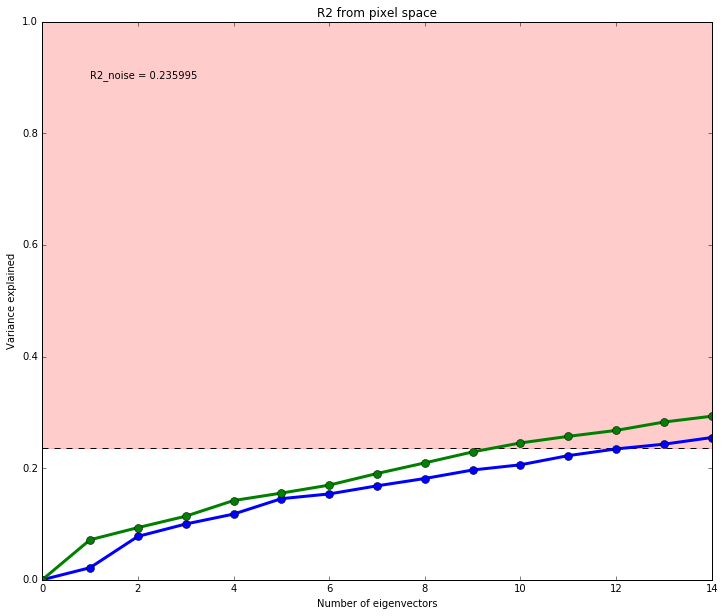

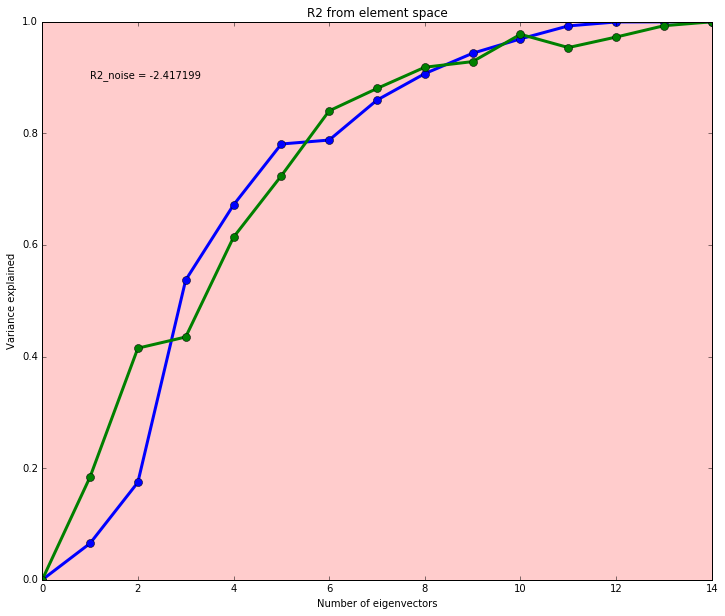

In [18]:
run run_empca -vugp -m red_clump/pickles/models/model_FE_H_u-0.1_d-0.105.pkl -d 2e-3 -n 14

In [128]:
def randomize_residual(residual,uncertainty):
    return uncertainty.T*np.random.randn(residual.shape[0],residual.shape[1])+residual

def weight(residual,numstars,model):
    weighted = np.ma.masked_array(np.zeros((len(elems),numstars)))
    i=0
    for elem in elems:
        weighted[i] = model.weighting_stars(residual,elem,'BLARGH.pkl')
        i+=1
    return weighted

In [129]:
iters=100
randoms = np.ma.masked_array(np.zeros((iters,len(elems),model.numstars)))
rands = np.ma.masked_array(np.zeros((iters,aspcappix,model.numstars)))
for i in range(iters):
    rand_resid = randomize_residual(model.residual,model.errs)
    rands[i] = rand_resid
    randoms[i] = weight(rand_resid,model.numstars,model)

In [130]:
stds_pix = np.zeros((aspcappix,model.numstars))
for i in range(aspcappix):
    pix_rands = rands[:,i]
    stds_pix[i] = np.std(pix_rands,axis=0)
diff_pix = model.errs.T - stds_pix

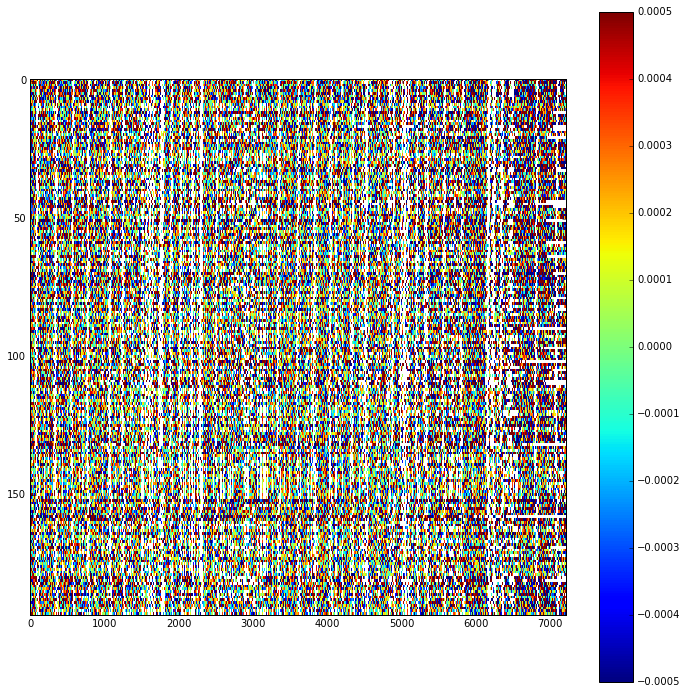

In [131]:
diff_pix=diff_pix.T
plt.figure(figsize=(12,12))
plt.imshow(diff_pix,aspect = float(diff_pix.shape[1])/diff_pix.shape[0],vmin=-5e-4,vmax=5e-4,interpolation='nearest')
plt.colorbar()

In [132]:
stds_elem = np.zeros((len(elems),model.numstars))
for i in range(len(elems)):
    elem_rands = randoms[:,i]
    stds_elem[i] = np.std(elem_rands,axis=0)
diff_elem = errs - stds_elem

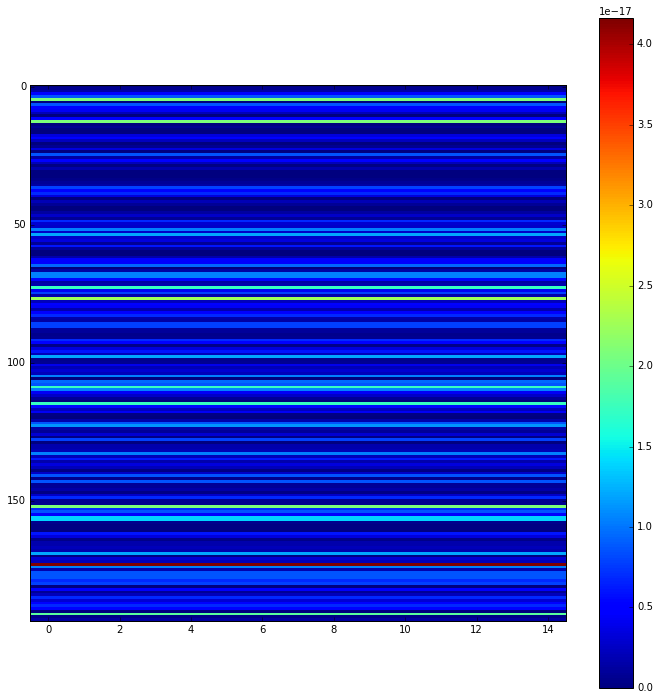

In [133]:
stds_elem = stds_elem.T
plt.figure(figsize=(12,12))
plt.imshow(stds_elem,aspect = float(stds_elem.shape[1])/stds_elem.shape[0],interpolation='nearest')
plt.colorbar()